## loading the data and packages

In [169]:
import pandas as pd
import numpy as np

from tqdm import tqdm
from datetime import datetime as dt

import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from scipy.sparse import csr_matrix


In [277]:
data = pd.read_csv('bank_transactions.csv', delimiter = ',')

In [2]:
data_20 = pd.read_csv('twenty_params_2.csv', delimiter = ',')#.drop(['Unnamed: 0'], axis = 1)
data_7 = pd.read_csv('seven_params_2.csv', delimiter = ',').reset_index(drop=True)
data_27 = pd.concat([data_20, data_7], axis = 1)
data_27.set_index('CustomerID', inplace = True)

In [3]:
data_27.fillna(0, inplace = True)
data_27.replace([np.inf, -np.inf], 0, inplace=True)

In [4]:
cols_for_norm = data_27.columns[0:28] # for now selecting only numerical values
data_num = data_27[cols_for_norm]
data_num.head()

,min_trans,max_trans,trans_greater_1k,balance_greater_100k,0.75_quant_trans,0.25_quant_trans,trans_val_var,min_balance,max_balance,diff_balance,...,nr_diff_dob,mean_age_trans,mean_ratio,max_ratio,nr_trans,TransactionAmount_INR,mean_trans,mean_balance,mean_diff,gender_most_freq
CustomerID,,,,,,,,,,,,,,,,,,,,,
C1010011,356.0,4750.0,2.0,2.0,3651.50,1454.50,1.0,32500.73,120180.54,87679.81,...,2,28.0,0.074556,0.002962,2,2.0,2553.0,76340.635,73787.635,0
C1010012,1499.0,1499.0,1.0,1.0,1499.00,1499.00,1.0,24204.49,24204.49,0.00,...,1,22.0,0.061931,0.061931,1,1.0,1499.0,24204.490,22705.490,1
C1010014,250.0,1205.0,2.0,2.0,966.25,488.75,1.0,38377.14,161848.76,123471.62,...,2,27.0,0.016472,0.001545,2,2.0,727.5,100112.950,99385.450,0
C1010018,30.0,30.0,0.0,1.0,30.00,30.00,1.0,496.18,496.18,0.00,...,1,26.0,0.060462,0.060462,1,0.0,30.0,496.180,466.180,0
C1010024,5000.0,5000.0,1.0,1.0,5000.00,5000.00,1.0,87058.65,87058.65,0.00,...,1,51.0,0.057433,0.057433,1,1.0,5000.0,87058.650,82058.650,1


## 2.2 Choose your features (variables)!

### Data Normalization
The initial data contains both continuous and discrete features which implies that the features variances may be of very different scales. We conduct a dimensionality reduction by PCA and want to retain dimensions from both feature types.
If this step is not conducted a PCA to a single dimension will already retain 80% of variance. To illustrate we plot below the clustering with n_clusters = 5 of unnormalized data projected into the space of the first two principal components. The clustering is conducted with data of 3 principal components.

Text(0.5, 1.0, 'k = 5 for unnormalized data')

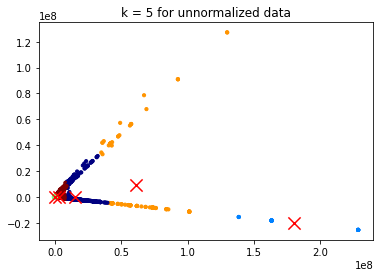

In [284]:
pca = PCA(n_components=3) # by setting n_components to float in [0,1] sklearn estimates the nr of dimension to keep
pca_data_notnorm = pca.fit_transform(data_num)

kmeans = KMeans(n_clusters=5, init='random', n_init=3, max_iter=300, tol=0.0001,random_state=None, copy_x=True, algorithm='auto')
kmeans.fit(pca_data_notnorm)

plt.scatter(pca_data_notnorm[:, 0], pca_data_notnorm[:, 1], s=10, c = kmeans.labels_.astype(float))

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0],centroids[:, 1],marker="x",s=150, c='red')
plt.title('k = 5 for unnormalized data')

Using sklearn StandarScaler and FunctionTransformer functions, we preprocess the data.

stdScaler = StandardScaler()
fctScaler = FunctionTransformer(np.log1p)
minmaxScaler = MinMaxScaler()
powerScaler = PowerTransformer() #  diffbalsnce!

cols_for_std_scaling = [ 'TransactionAmount_INR', 'mean_balance', 'mean_diff', 'diff_balance']
cols_for_fct_scaling = [ '0.75_quant_trans', '0.25_quant_trans', 'mean_ratio']
cols_for_pow_scaling = []
cols_for_minmax_scaling = ['min_trans', 'max_trans', 'max_ratio','min_balance', 'max_balance','mean_trans'] #'mean_age_trans'



stdScaler = StandardScaler()
fctScaler = FunctionTransformer(np.log1p)
minmaxScaler = MinMaxScaler()
powerScaler = PowerTransformer() #  diffbalsnce!

cols_for_std_scaling = [ 'max_ratio','min_trans', 'max_trans', 'TransactionAmount_INR', 'mean_trans', 'mean_balance', 'mean_diff', 'diff_balance', 'mean_age_trans']
cols_for_fct_scaling = [ '0.75_quant_trans', '0.25_quant_trans','min_balance', 'max_balance']
cols_for_pow_scaling = ['mean_ratio']


stdScaler = StandardScaler()
fctScaler = FunctionTransformer(np.log1p)
cols_for_std_scaling = [ 'diff_balance', 'mean_ratio', 'max_ratio', 'TransactionAmount_INR', 'mean_trans', 'mean_balance', 'mean_diff']
cols_for_fct_scaling = ['min_trans', 'max_trans', '0.75_quant_trans', '0.25_quant_trans','min_balance', 'max_balance']



In [276]:

stdScaler = StandardScaler()
fctScaler = FunctionTransformer(np.log1p)
minmaxScaler = MinMaxScaler()
powerScaler = PowerTransformer() #  diffbalsnce!

cols_for_std_scaling = [ 'max_ratio','min_trans', 'max_trans', 'TransactionAmount_INR', 'mean_trans', 'mean_balance', 'mean_diff', 'diff_balance', 'mean_age_trans']
cols_for_fct_scaling = [ '0.75_quant_trans', '0.25_quant_trans','min_balance', 'max_balance']
cols_for_pow_scaling = ['mean_ratio']

In [277]:
data_norm = data_num.copy() # 
data_norm[cols_for_std_scaling] = powerScaler.fit_transform(data_norm[cols_for_std_scaling])
data_norm[cols_for_fct_scaling] = fctScaler.transform(data_norm[cols_for_fct_scaling])
data_norm[cols_for_pow_scaling] = powerScaler.fit_transform(data_norm[cols_for_pow_scaling])
#data_norm[cols_for_minmax_scaling] = minmaxScaler.fit_transform(data_norm[cols_for_minmax_scaling])

We conduct the same illustration as above for the normalized data: Do a principal component analysis with n_components = 4 and cluster the data to k = 5 centroids.

Text(0.5, 1.0, 'k = 5 for normalized data')

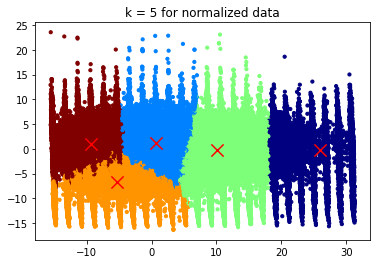

In [283]:
pca = PCA(n_components=3) # by setting n_components to float in [0,1] sklearn estimates the nr of dimension to keep
pca_data = pca.fit_transform(data_norm)

kmeans = KMeans(n_clusters=5, init='random', n_init=3, max_iter=300, tol=0.0001,random_state=None, copy_x=True, algorithm='auto')
kmeans.fit(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], s=10, c = kmeans.labels_.astype(float))

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0],centroids[:, 1],marker="x",s=150, c='red')
plt.title('k = 5 for normalized data')

### Dimensionality Reduction
The dimensionality is reduced using sklearns PCA method. The number of dimensions is chosen such that the 80 % of the total data variance is retained.

In [285]:
pca = PCA(n_components=0.80) # by setting n_components to float in [0,1] sklearn estimates the nr of dimension to keep
pca_data = pca.fit_transform(data_norm) # back to data_num from data_norm because kmeans says 0 vectors, no! my fault
pca_data.shape

sparse_pca_data = csr_matrix(pca_data)

In [90]:
pca_data.var()
pca.explained_variance_

array([97.52113513, 75.58936889, 11.98968552])

In [ ]:
# TODO:  Explain why you chose that method and the limitations it may have.

## 2.3 Clustering!

I tried to use a map reduce format, not elegant and slow but seemingly working at this point. Using the whole dataset (reduced to 4 dimensions) an iteration takes 10 s
TODO: easiest part to improve is when generating shuffled assignment ? 

In [ ]:
# old function!
#
def makeNewCentroids_original(assigned): #shuffle in sense that all centroids are group together and reduce by calculating new centroids from data
    shuffled = {}
    #fill_dict =  lambda k, v : shuffled.setdefault(k, []).append(v)
    #map(lambda x: fill_dict(x[0],x[1]), assigned)
    for e in assigned:
        try:
            shuffled[e[0]].append(e[1])
        except:
            shuffled[e[0]] = [e[1]]

    new_centroids = calcNewCentroid(shuffled)
    #centroids_hist[iter+1] = new_centroids
    return (shuffled, new_centroids)
    # ?? fused these two part into makeNewCentroids below ??
def calcNewCentroid(shuffled):
    centroids = map( lambda rows: np.mean(data[rows], axis = 0), shuffled.values())
    arr =  np.array(list(centroids))
    #arr = np.fromiter(centroids, dtype=np.float32)
    return arr

In [293]:
## matteos first implementation, with mapping and reducing 

def findNearCentroid(row): # map
    dist = np.sum((centroids_hist[iter]-data[row])**2, axis=1)
    closest = np.argmin(dist)
    return(closest,row) # opposite wont work


def makeNewCentroids(assigned): #shuffle in sense that all centroids are grouped together and reduce by calculating new centroids from data
    shuffled = {}
    #fill_dict =  lambda k, v : shuffled.setdefault(k, []).append(v)
    #map(lambda x: fill_dict(x[0],x[1]), assigned)
    for e in assigned:
        try:
            shuffled[e[0]].append(e[1])
        except:
            shuffled[e[0]] = [e[1]]

    centroids = map( lambda rows: np.mean(data[rows], axis = 0), shuffled.values())
    new_centroids = np.array(list(centroids))
    return (shuffled, new_centroids)

    

def kmeans(k, data, maxIter):
    centroids = np.random.randint(0, data.shape[0], k)
    
    global centroids_hist
    centroids_hist = np.zeros((maxIter+1, k, data.shape[1]), dtype=float)
    centroids_hist[0]= data[centroids]

    rows = np.arange(0, data.shape[0])

    global iter 
    iter = 0

    converge = False

    while (iter < maxIter and not converge):
        centroids = centroids_hist[iter]
        assigned = map(findNearCentroid, rows) # mapping
        # cp_assigned = [el for el in assigned] # cant copy or modify map object 'assigned' or is empty when passed to makeNewCentoids
        # so access in 

        shuffled, new_centroids = makeNewCentroids(assigned) # shuffling and reducing
        centroids_hist[iter+1] = new_centroids ## fails at times

        if iter > 0 and np.array_equal(centroids_hist[iter],centroids_hist[iter+1]):
             converge = True
             
        print(iter)
        iter +=1

    return centroids_hist, shuffled


In [ ]:
# TODO: sometimes fails, because broadcasting shape in part ***, how come nr centroids smalle that init?
# test_data is 100 row smaple
data  = pca_data

out = kmeans(5, data, 10) # 10s for an iteration of whole dataset

### Optimal Number of Clusters 
We run the clustering algorithm with n_clusters set in the range [1,10]

#### Elbow Method
Plotting the sum of square distances of data to closest centroid versus the number of centroids.

In [290]:
var = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='random', n_init=3, max_iter=300, tol=0.0001,random_state=None, copy_x=True, algorithm='auto')
    kmeans.fit(sparse_pca_data)
    var.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow method for ideal # clusters')

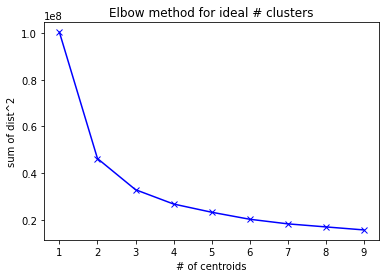

In [291]:
plt.plot(np.arange(1,10), var, 'bx-')
plt.xlabel('# of centroids')
plt.ylabel('sum of dist^2')
plt.title('Elbow method for ideal # clusters')

#### Silhouette analysis
We try ? no, is insanely slow
silhouettes = []
from sklearn.metrics import silhouette_score

for i in range(2,10): # ! won't work for 1, as all would be assigned to one
   kmeans = KMeans(n_clusters=i, init='random', n_init=3, max_iter=300, tol=0.0001,random_state=None, algorithm='auto')
   kmeans.fit(sparse_pca_data)
   labels = kmeans.labels_
   silhouettes.append(silhouette_score(sparse_pca_data, labels, metric = 'euclidean'))
   print(i)

plt.plot(np.arange(2,10),silhouettess,'bx-')

plt.xlabel('# of centroids')
plt.ylabel('silhouette score')
plt.title('Silhouette analysis for ideal # clusters')

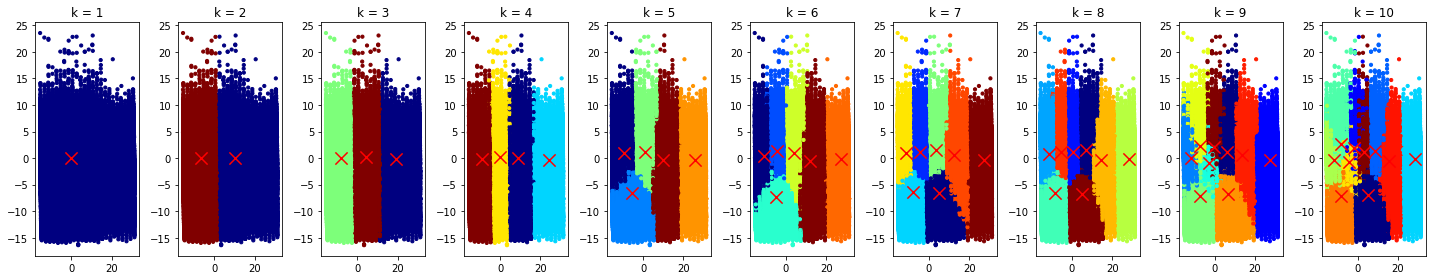

In [292]:

fig,ax = plt.subplots(1,10, figsize = (20,4))

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='random', n_init=3, max_iter=300, tol=0.0001,random_state=None, algorithm='auto')
    kmeans.fit(pca_data)

    cmap = plt.cm.get_cmap('jet', i)

    ax[i-1].scatter(pca_data[:, 0], pca_data[:, 1], s=10, c = kmeans.labels_.astype(float))

    centroids = kmeans.cluster_centers_
    ax[i-1].scatter(centroids[:, 0],centroids[:, 1],marker="x",s=150, c='red')
    ax[i-1].set_title('k = '+str(i))

fig.tight_layout()

The elbow method indicates that the ideal number of clusters is around 3, 4 or 5 may also be considered. Given the above plot we can not clearly state the ideal number of clusters. The first vertical splitting of clusters is observed when going from 4 to 5. Choose k = 5.

### Run the Algorithm

In [294]:
data  = pca_data

out = kmeans(5, data, 20)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [334]:
# for each data row (customerID) get cluster centroid
d = out[1]
cols = []
for k,v in d.items():
    for x in v:
        cols.append([x,k])

cols = np.sort(np.array(cols), axis = 0)[:, 1]

In [341]:
centroids = out[0][20] # centroids of the last iteration

Text(0.5, 1.0, 'K-means with = 5')

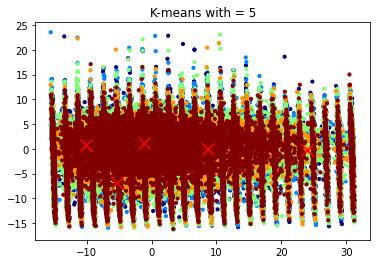

In [343]:
plt.scatter(data[:, 0], data[:, 1], s=10, c = cols)

plt.scatter(centroids[:, 0],centroids[:, 1],marker="x",s=150, c='red')
plt.title('K-means with = 5')
# TODO: ! macht ned viel sinn

### KMeans with scikit-learn Library

Text(0.5, 1.0, 'K-means++ with = 5')

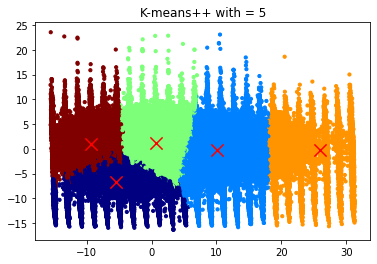

In [308]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=3, max_iter=300, tol=0.0001,random_state=None, algorithm='auto')
kmeans.fit(pca_data)

#cmap = plt.cm.get_cmap('jet', i)

plt.scatter(pca_data[:, 0], pca_data[:, 1], s=10, c = kmeans.labels_.astype(float))

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0],centroids[:, 1],marker="x",s=150, c='red')
plt.title('K-means++ with = 5')